<a href="https://colab.research.google.com/github/HwangHanJae/Dacon_tutorial/blob/main/Dacon_creditcard_user_delinquency_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.라이브러리 로드

In [645]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats

plt.style.use("ggplot")
set_matplotlib_formats('svg')

# 1.데이터 로드

## 1.1 데이터 구성

- index : index
- gender : 성별
- car : 차량 소유 여부
- reality : 부동산 소유 여부
- child_num : 자녀수
- income_total : 연간 소득
- income_type : 소득 분류
  - Commercial associate : 상업관계자
  - Working : 일반 회사원
  - State servant : 공무원
  - Pensioner : 연금 수령자
  - Student : 학생
- edu_type : 교육 수준
  - Higher education : 고등교육
  - Secondary/secondary special : ?
  - Incomplete higher : 불완전 고등 교육
  - Lower secondary : ?
  - Academic degree : 학위
- family_type : 결혼 여부
  - Married : 기혼
  - Civil marriage : 내혼(사실혼)-동거
  - Separated : 별거
  - Single/not married : 싱글
  - Widow : 과부(홀어미)
- house_type : 생활 방식
  - Municipal apartment : 시립 아파트
  - House/apartment : 아파트
  - With parents : 부모님과 거주
  - Co-op apartment : 협동 아파트
  - Rented apartment : 임대 아파트
  - Office apartment : 오피스 아파트
- DAYS_BIRTH : 출생일
  - 데이터 수집 당시 (0) 부터 역으로 셈
  - 즉 -1은 데이터 수집일 하루 전에 태어났음을 의미
- DAYS_EMPLOYED : 업무 시작일
  - 데이터 수집 당시 (0) 부터 역으로 셈
  - 즉 -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
  - 양수 값은 고용되지 않은 상태를 의미
- FLAG_MOBIL : 핸드폰 소유 여부
- work_phone : 업무용 전화 소유 여부
- phone : 전화 소유 여부
- email : 이메일 소유 여부
- occyp_type : 직업 유형
- family_size : 가족 규모
- begin_month : 신용카드 발급 월
  - 데이터 수집 당시 (0)부터 역으로 셈
  - 즉 -1은 데이터 수집일 한달 전에 신용카드를 발급함을 의미
- <strong>credit(target) : 사용자의 신용카드 대금 연체를 기준으로 한 신용도
  - 낮을 수록 높은 신용의 신요카드 사용자를 의미함</strong>

In [646]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/Data/creditcard/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/Data/creditcard/test.csv")

In [647]:
#데이터 미리보기
train.sample(5)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
11159,11159,F,N,Y,0,247500.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-13810,-1252,1,0,1,0,Private service staff,1.0,-24.0,2.0
11602,11602,M,Y,N,0,229500.0,Working,Incomplete higher,Married,Co-op apartment,-18325,-1256,1,0,0,0,Laborers,2.0,-34.0,2.0
10983,10983,F,N,N,0,270000.0,Working,Secondary / secondary special,Married,House / apartment,-17778,-1719,1,1,1,0,High skill tech staff,2.0,-32.0,2.0
22907,22907,M,Y,Y,0,112500.0,Commercial associate,Higher education,Married,House / apartment,-14229,-1112,1,0,0,0,Security staff,2.0,-44.0,2.0
19394,19394,M,Y,Y,2,247500.0,Working,Incomplete higher,Married,House / apartment,-13102,-962,1,0,0,0,Drivers,4.0,-9.0,2.0


In [648]:
train.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [649]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [650]:
test.sample(5)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
5974,32431,M,N,N,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,-13639,-430,1,0,0,0,Laborers,4.0,-11.0
2889,29346,F,N,N,0,202500.0,State servant,Higher education,Married,House / apartment,-17274,-1348,1,0,1,0,Laborers,2.0,-21.0
2666,29123,M,Y,Y,0,247500.0,Working,Secondary / secondary special,Married,House / apartment,-10952,-3577,1,1,0,0,Laborers,2.0,-52.0
6292,32749,F,N,N,0,180000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12024,-210,1,1,1,0,Sales staff,2.0,-2.0
9072,35529,F,N,Y,0,114750.0,Working,Secondary / secondary special,Widow,House / apartment,-20325,-4213,1,1,1,0,Security staff,1.0,-44.0


In [651]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     6848 non-null   object 
 17  family_size    10000 non-null  float64
 18  begin_m

# 2.EDA

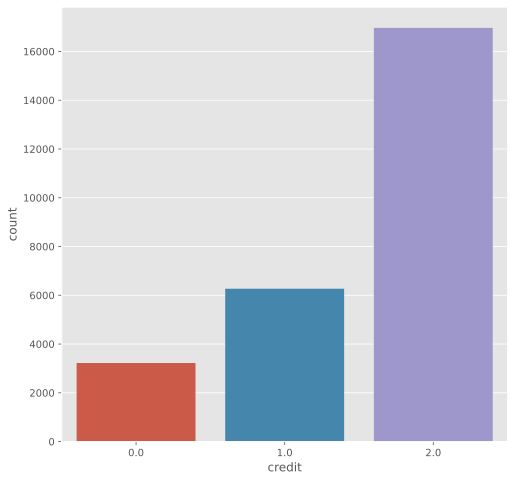

In [652]:
plt.figure(figsize=(8,8))
sns.countplot(data=train, x='credit')

신용도는 2.0을 가진 사람들이 대부분이고 1.0, 0.0 순이다

2.0 > 1.0 > 0.0 

In [653]:
train['gender'] = train['gender'].map({"M":0,"F":1})

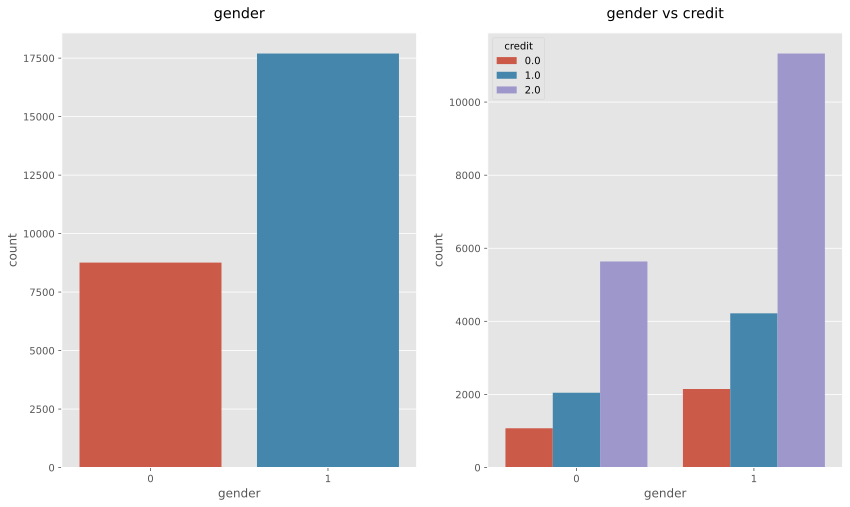

In [654]:
f, ax = plt.subplots(1,2,figsize=(14,8))
sns.countplot(data=train, x='gender', ax=ax[0])
ax[0].set_title("gender", y=1.02)
sns.countplot(data=train, x='gender', hue='credit',ax=ax[1])
ax[1].set_title("gender vs credit", y=1.02)
plt.show()

기본적으로 여성의 수가 남성의 수보다 많음

여성과 남성 둘다 2.0 > 1.0 > 0.0 순의 신용도를 가짐

In [655]:
train['car'] = train['car'].map({'Y':0,"N":1})

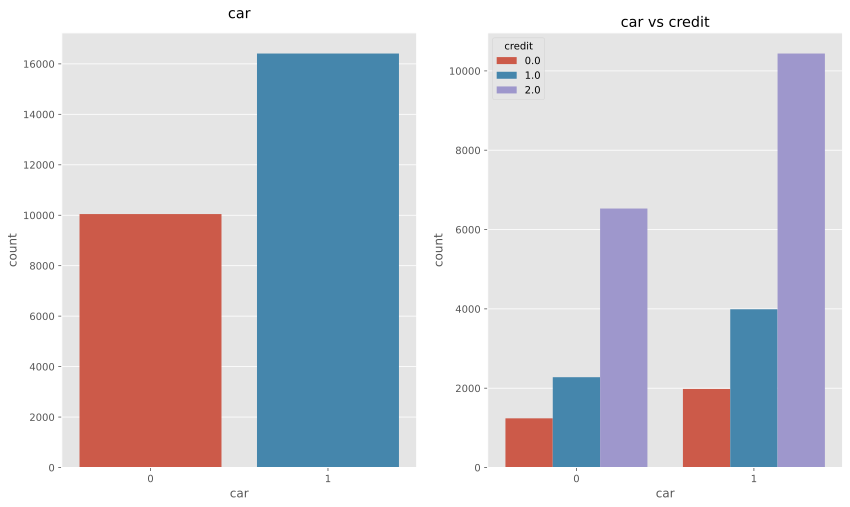

In [656]:
f, ax = plt.subplots(1,2, figsize=(14,8))
sns.countplot(data=train, x='car', ax=ax[0])
ax[0].set_title('car', y=1.02)
sns.countplot(data=train, x='car',hue='credit', ax=ax[1])
ax[1].set_title("car vs credit")
plt.show()

차를 소유하지 않은 사람의 수가 더 많음

차의 소유 여부와 상관없이 2.0, 1.0, 0.0의 순으로 신용도를 보임

In [657]:
train['reality'] = train['reality'].map({"Y":0,"N":1})

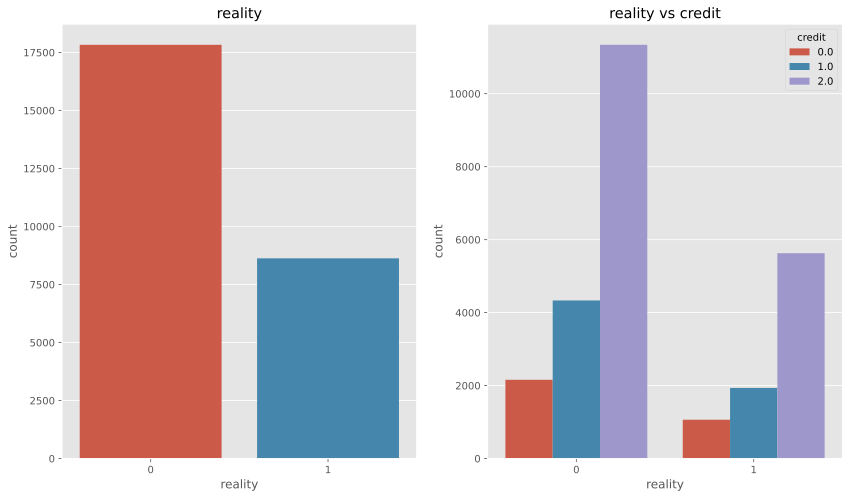

In [658]:
f, ax = plt.subplots(1,2,figsize=(14,8))
sns.countplot(data=train, x='reality', ax=ax[0])
ax[0].set_title("reality")
sns.countplot(data=train, x='reality', hue='credit', ax=ax[1])
ax[1].set_title("reality vs credit")
plt.show()

부동산을 소유한 사람이 더 많음

역시 2.0, 1.0, 0.0 순으로 신용도를 보임

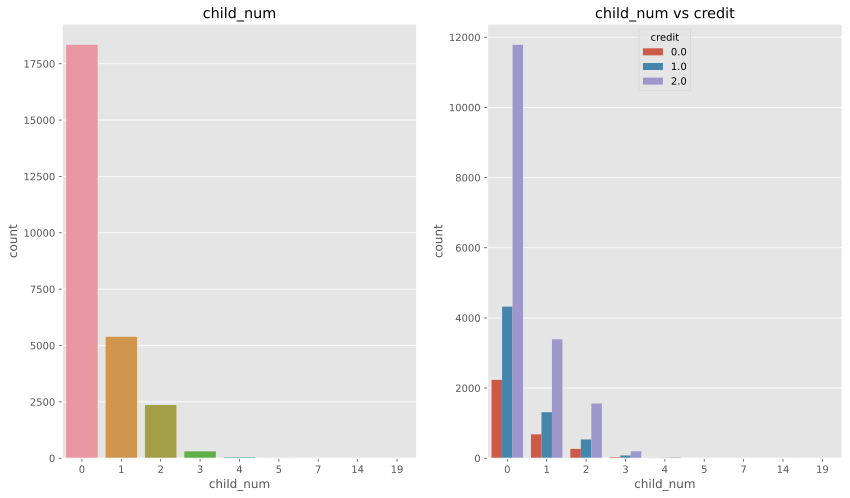

In [659]:
f, ax = plt.subplots(1,2,figsize=(14,8))
sns.countplot(data=train , x="child_num", ax=ax[0])
ax[0].set_title("child_num")
sns.countplot(data=train, x='child_num', hue='credit', ax=ax[1])
ax[1].set_title("child_num vs credit")
plt.show()

In [660]:
train["child_num"].value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

대부분의 사람들 자녀의 수 0명이고 5명이상인 표본은 적은 것을 확인할 수 있음


계산하거나 보기 편하도록 income_total(연간 소득) 값에 1000을 나눔

In [661]:
train['income_total'] = train['income_total'] / 1000

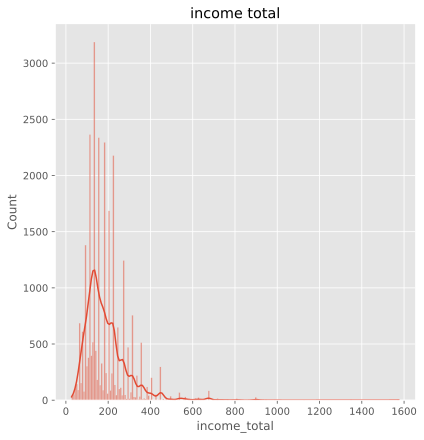

In [662]:
g = sns.displot(data=train, x='income_total', height=6,  kde=True)
plt.title("income total")
plt.show()

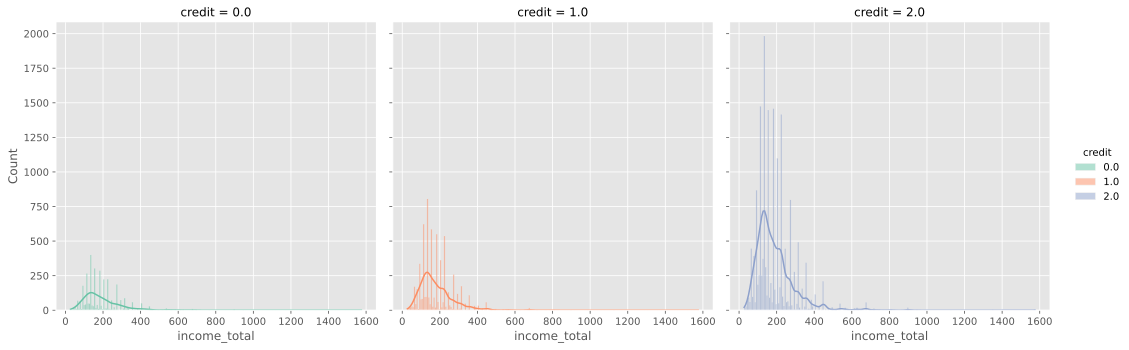

In [663]:
g = sns.displot(data=train, x='income_total', col="credit", hue='credit', height=5, kde=True, palette="Set2", )

plt.show()

Text(0.5, 1.0, 'income total vs credit')

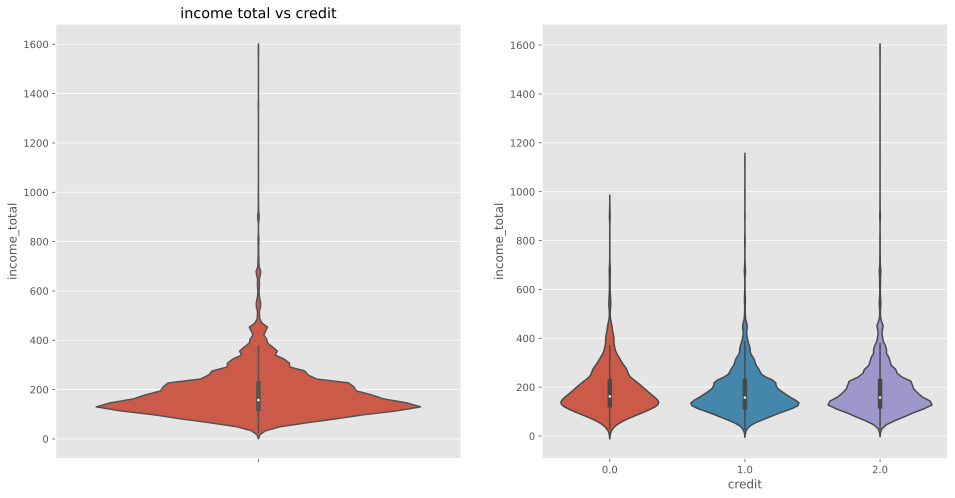

In [664]:
f, ax = plt.subplots(1,2,figsize=(16,8))
sns.violinplot(data=train, y='income_total', ax=ax[0])
ax[0].set_title("income total")
sns.violinplot(data=train,y='income_total', x='credit', ax=ax[1])
ax[0].set_title("income total vs credit")

Text(0.5, 1.0, 'income total vs credit')

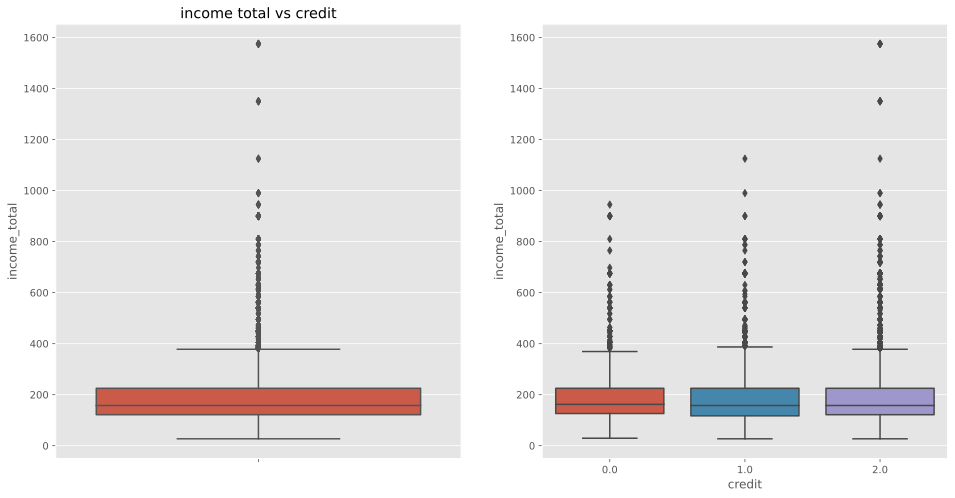

In [665]:
f, ax = plt.subplots(1,2,figsize=(16,8))
sns.boxplot(data=train, y='income_total', ax=ax[0])
ax[0].set_title("income total")
sns.boxplot(data=train,y='income_total', x='credit', ax=ax[1])
ax[0].set_title("income total vs credit")

In [666]:
train['income_total'].describe()

count    26457.000000
mean       187.306524
std        101.878368
min         27.000000
25%        121.500000
50%        157.500000
75%        225.000000
max       1575.000000
Name: income_total, dtype: float64

income_total(연간소득)을 그룹화 시킴

In [667]:
train['income_total_group'] = np.nan

In [668]:
train.loc[(0<train["income_total"]) & (train['income_total'] < 100), "income_total_group"] = "100_less"
train.loc[(100<train["income_total"]) & (train['income_total'] < 200), "income_total_group"] = "200_less"
train.loc[(200<train["income_total"]) & (train['income_total'] < 300), "income_total_group"] = "300_less"
train.loc[(300<train["income_total"]) & (train['income_total'] < 400), "income_total_group"] = "400_less"
train.loc[(400<train["income_total"]) & (train['income_total'] < 500), "income_total_group"] = "500_less"
train.loc[(500<train["income_total"]), "income_total_group"] = "500_more"

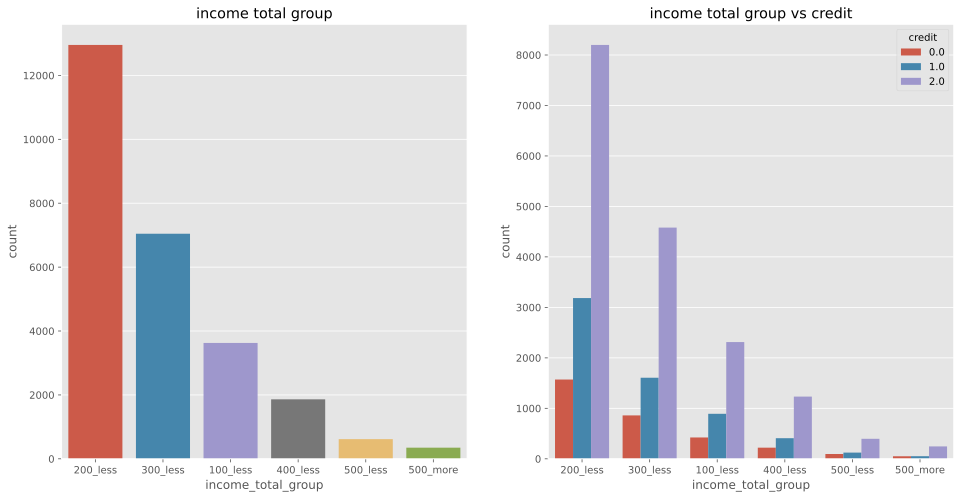

In [669]:
f, ax = plt.subplots(1,2, figsize=(16,8))
sns.countplot(data=train, x='income_total_group',ax=ax[0], order=train["income_total_group"].value_counts().sort_values(ascending=False).index)
ax[0].set_title("income total group")
sns.countplot(data=train, x='income_total_group',hue='credit', ax=ax[1], order=train["income_total_group"].value_counts().sort_values(ascending=False).index)
ax[1].set_title("income total group vs credit")
plt.show()

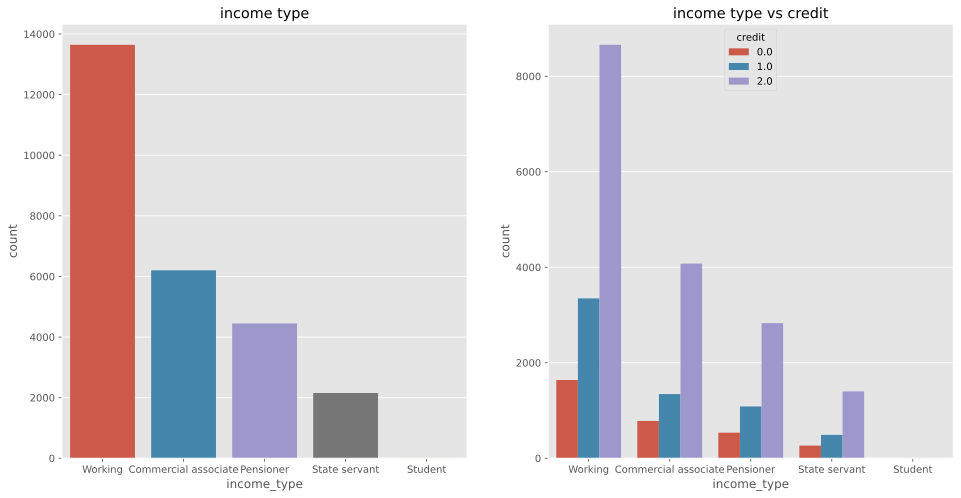

In [670]:
f, ax = plt.subplots(1,2, figsize=(16,8))
sns.countplot(data=train, x='income_type', ax=ax[0], order=train['income_type'].value_counts().sort_values(ascending=False).index)
ax[0].set_title("income type")
sns.countplot(data=train, x='income_type', hue='credit', ax=ax[1],order=train['income_type'].value_counts().sort_values(ascending=False).index)
ax[1].set_title("income type vs credit")
plt.show()

Working > Commercial associate > Pensioner > State sevant > Student 순으로 많음


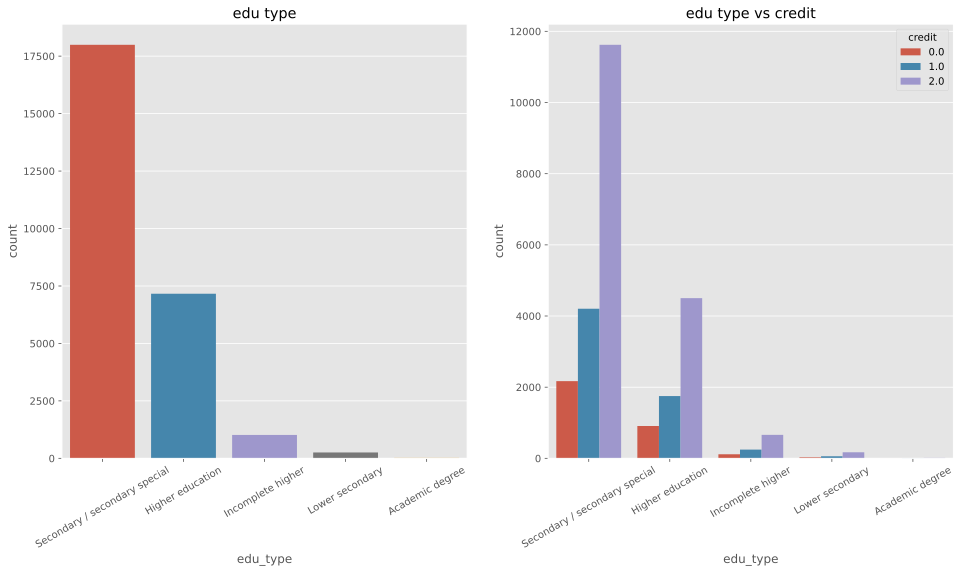

In [671]:
f, ax = plt.subplots(1,2, figsize=(16,8))
g = sns.countplot(data=train, x='edu_type', ax=ax[0], order=train['edu_type'].value_counts().sort_values(ascending=False).index)
ax[0].set_title("edu type")
g.set_xticklabels(g.get_xticklabels(),rotation=30)
g = sns.countplot(data=train, x='edu_type',hue='credit', ax=ax[1], order=train['edu_type'].value_counts().sort_values(ascending=False).index)
ax[1].set_title("edu type vs credit")
g.set_xticklabels(g.get_xticklabels(),rotation=30)
plt.show()

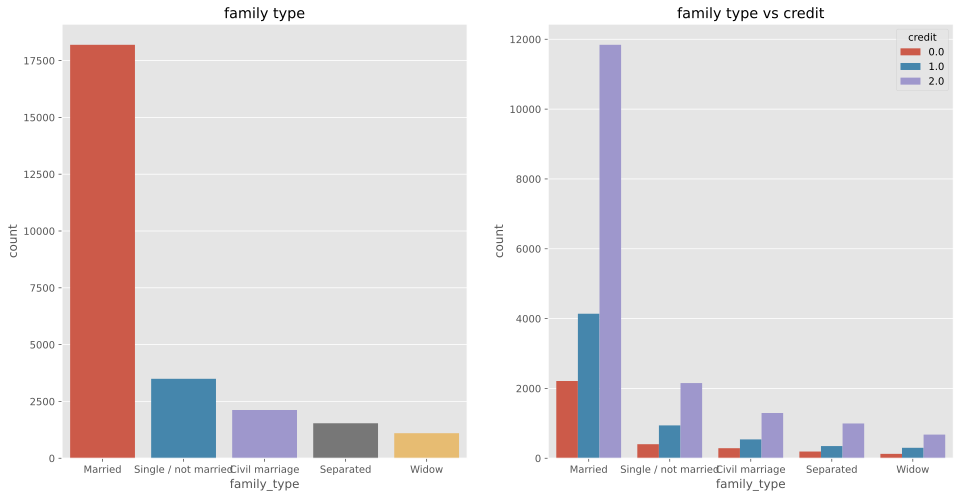

In [672]:
f, ax = plt.subplots(1,2, figsize=(16,8))
sns.countplot(data=train, x='family_type', ax=ax[0], order=train['family_type'].value_counts().sort_values(ascending=False).index)
ax[0].set_title("family type")
sns.countplot(data=train, x='family_type', hue='credit', ax=ax[1],order=train['family_type'].value_counts().sort_values(ascending=False).index)
ax[1].set_title("family type vs credit")
plt.show()

Married > Single / not married > Civil marriage > Separated  > Widow

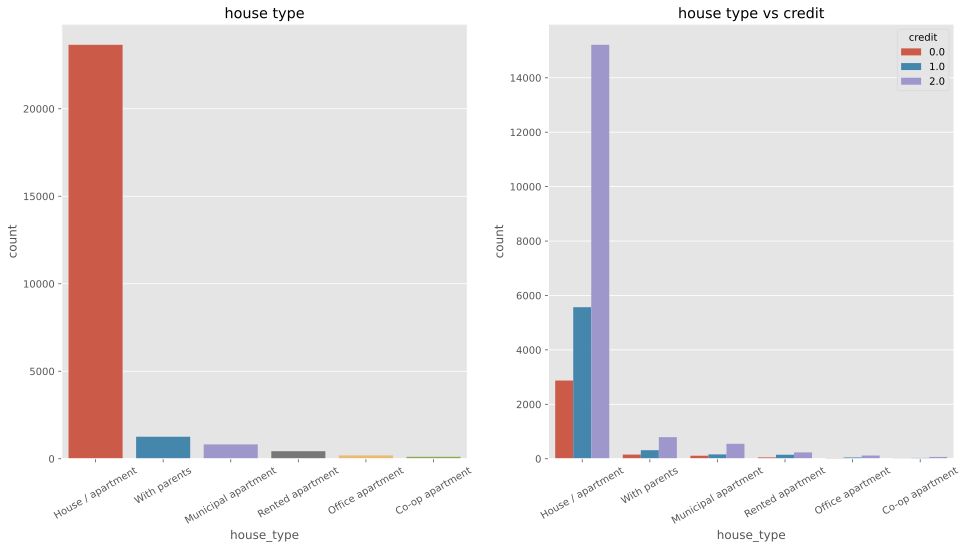

In [673]:
f, ax = plt.subplots(1,2,figsize=(16,8))
g = sns.countplot(data=train, x='house_type', ax=ax[0], order=train['house_type'].value_counts().sort_values(ascending=False).index)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
ax[0].set_title("house type")
g = sns.countplot(data=train, x='house_type', hue='credit', ax=ax[1], order=train['house_type'].value_counts().sort_values(ascending=False).index)
ax[1].set_title("house type vs credit")
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.show()

DAYS_BIRTH는 데이터 수집일 기준으로 0부터 역으로 날짜를 세었음 

즉 -365는 데이터 수집일 기준으로 365일 전에 태어났다는 것임.

각 데이터를 -365를 나누면 내림을 하면 데이터 수집일 기준 나이를 구할 수 있지 않을까란 아이디어.

In [674]:
train['age'] = np.trunc(train["DAYS_BIRTH"] / -365)

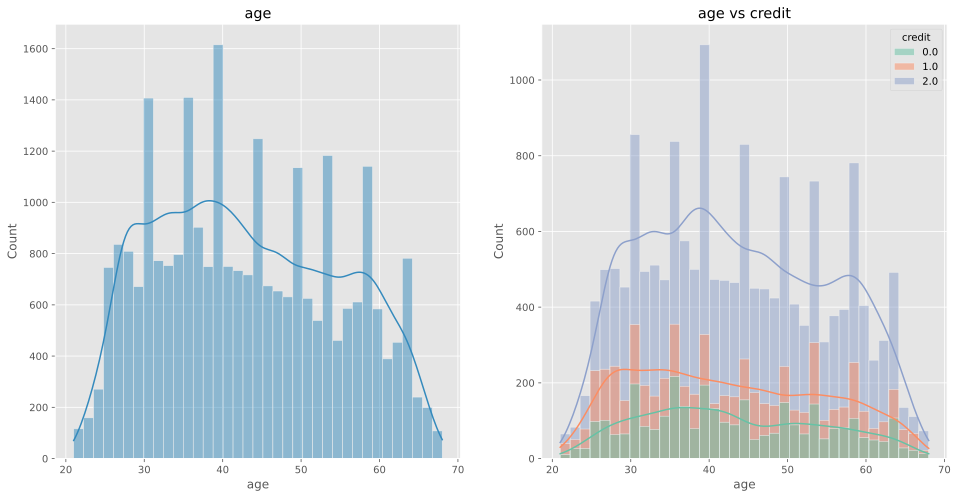

In [675]:
f, ax=plt.subplots(1,2,figsize=(16,8))
sns.histplot(data=train, x='age', kde=True, ax=ax[0])
ax[0].set_title("age")
sns.histplot(data=train, x='age', kde=True, hue="credit",ax=ax[1], palette="Set2")
ax[1].set_title("age vs credit")
plt.show()

데이터 수집일 기준 나이를 group하여 표현

20대 이하와 70이상의 데이터는 없음.

In [676]:
train['age_group'] = np.nan

In [677]:
train.loc[(20 <= train['age']) &(train['age'] < 30), "age_group"] = "20s"
train.loc[(30 <= train['age']) &(train['age'] < 40), "age_group"] = "30s"
train.loc[(40 <= train['age']) &(train['age'] < 50), "age_group"] = "40s"
train.loc[(50 <= train['age']) &(train['age'] < 60), "age_group"] = "50s"
train.loc[(60 <= train['age']) &(train['age'] < 70), "age_group"] = "60s"

Text(0.5, 1.0, 'age_group vs credit')

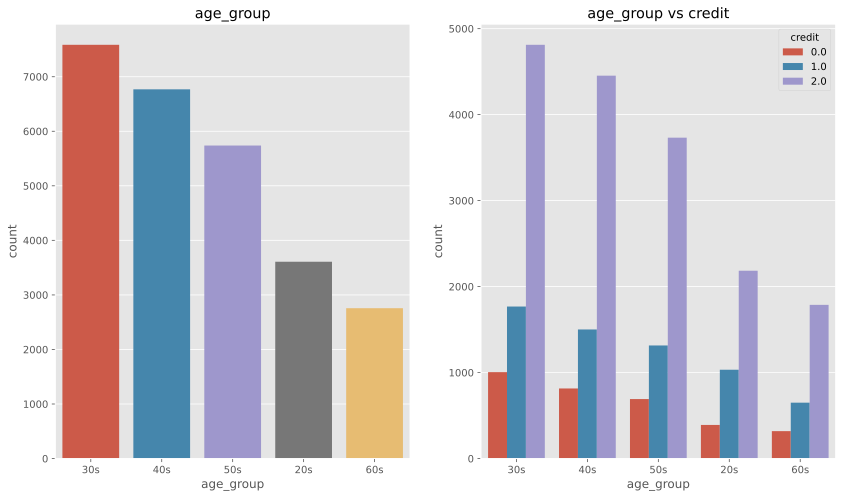

In [678]:
f, ax = plt.subplots(1,2,figsize=(14,8))
sns.countplot(data=train, x='age_group',order=train['age_group'].value_counts().sort_values(ascending=False).index, ax=ax[0])
ax[0].set_title("age_group")
sns.countplot(data=train, x='age_group',order=train['age_group'].value_counts().sort_values(ascending=False).index, ax=ax[1], hue='credit')
ax[1].set_title("age_group vs credit")

DAYS_EMPLOYED(업무시작일) 또한 DAYS_BIRTH(출생일)와 마찬가지로 계산하고, 양수값은 따로 그룹화 함.

In [679]:
train['employed_year'] = np.nan

In [680]:
train['employed_year'] = np.trunc(train["DAYS_EMPLOYED"] / -365)
train.loc[train['employed_year'] == -1000, "employed_year"] = -1 # -1은 미취업 상태

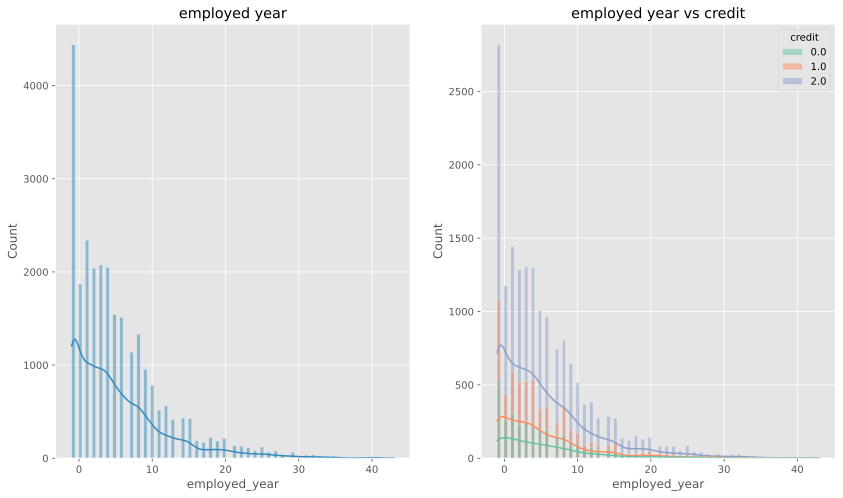

In [681]:
f, ax=plt.subplots(1,2,figsize=(14,8))
sns.histplot(data=train, x='employed_year', ax=ax[0], kde=True)
ax[0].set_title("employed year")
sns.histplot(data=train, x='employed_year', ax=ax[1], kde=True, hue='credit', palette="Set2")
ax[1].set_title("employed year vs credit")
plt.show()

In [682]:
train["employed_group"] = np.nan

In [683]:
train.loc[train['employed_year'] == -1, "employed_group"] = "Unemployed"
train.loc[(0 <= train['employed_year']) & (train['employed_year'] <= 5), "employed_group"] = "5Less"
train.loc[(5 < train['employed_year']) & (train['employed_year'] <= 10), "employed_group"] = "10Less"
train.loc[(10 < train['employed_year']) & (train['employed_year'] <= 15), "employed_group"] = "15Less"
train.loc[(15 < train['employed_year']) & (train['employed_year'] <= 20), "employed_group"] = "20Less"
train.loc[(20 < train['employed_year']) & (train['employed_year'] <= 25), "employed_group"] = "25Less"
train.loc[(25 < train['employed_year']) & (train['employed_year'] <= 30), "employed_group"] = "30Less"
train.loc[(30 < train['employed_year']), "employed_group"] = "30More"

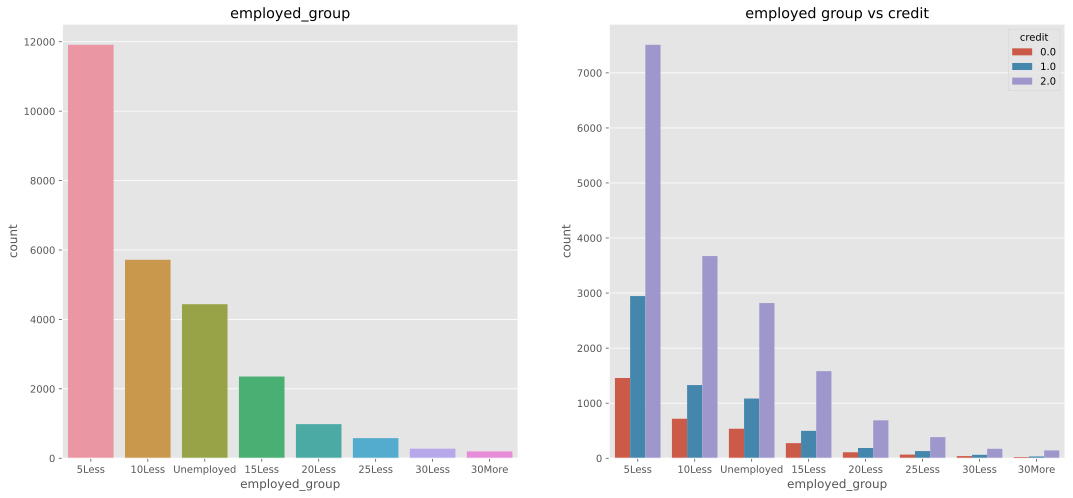

In [684]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.countplot(data=train, x='employed_group',order=train['employed_group'].value_counts().sort_values(ascending=False).index, ax=ax[0])
ax[0].set_title("employed_group")
sns.countplot(data=train, x='employed_group',order=train['employed_group'].value_counts().sort_values(ascending=False).index, ax=ax[1], hue='credit')
ax[1].set_title("employed group vs credit")
plt.show()

In [685]:
train.loc[train['FLAG_MOBIL'] != 1,"FLAG_MOBIL"] .sum()

0

In [686]:
test.loc[test['FLAG_MOBIL'] != 1,"FLAG_MOBIL"] .sum()

0

데이터를 수집시 모든 인원은 휴대폰을 가지고 있음

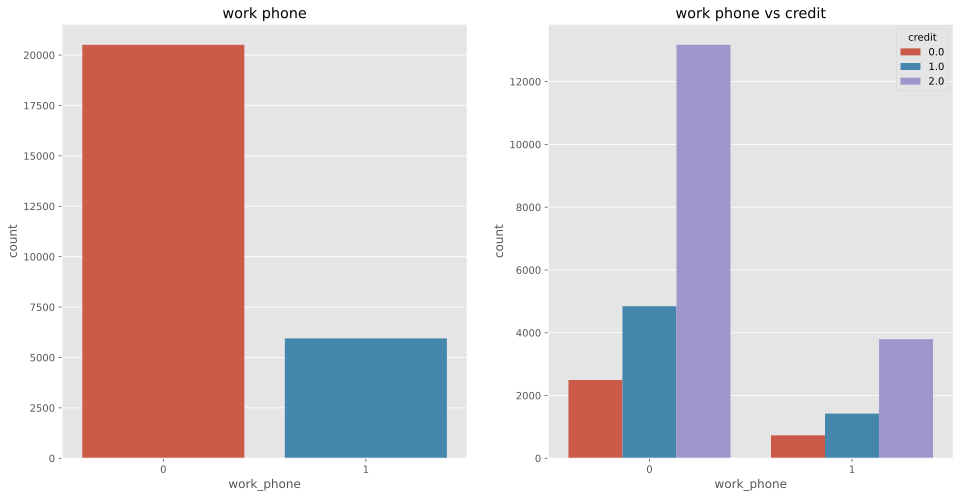

In [687]:
f, ax=plt.subplots(1, 2,figsize=(16,8))
sns.countplot(data=train, x="work_phone",ax=ax[0])
ax[0].set_title("work phone")
sns.countplot(data=train, x="work_phone",ax=ax[1], hue='credit')
ax[1].set_title("work phone vs credit")
plt.show()

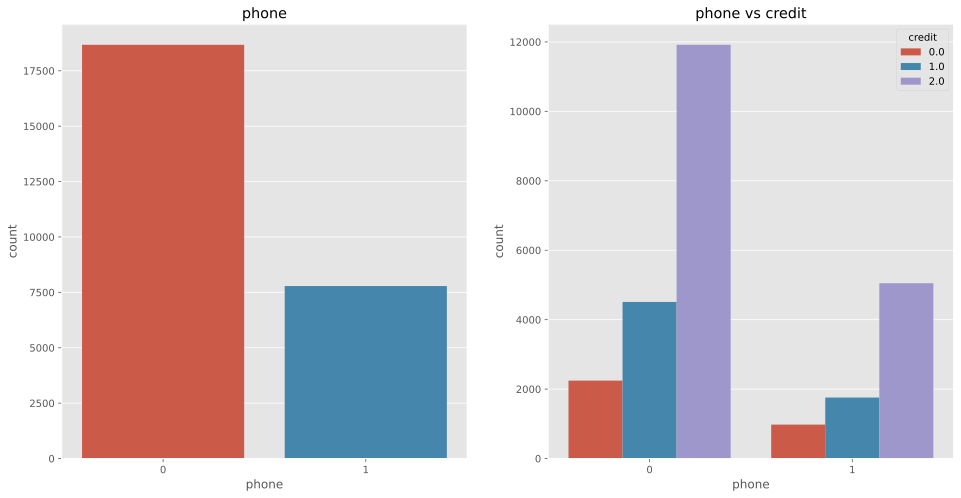

In [688]:
f, ax=plt.subplots(1, 2,figsize=(16,8))
sns.countplot(data=train, x="phone",ax=ax[0])
ax[0].set_title("phone")
sns.countplot(data=train, x="phone",ax=ax[1], hue='credit')
ax[1].set_title("phone vs credit")
plt.show()

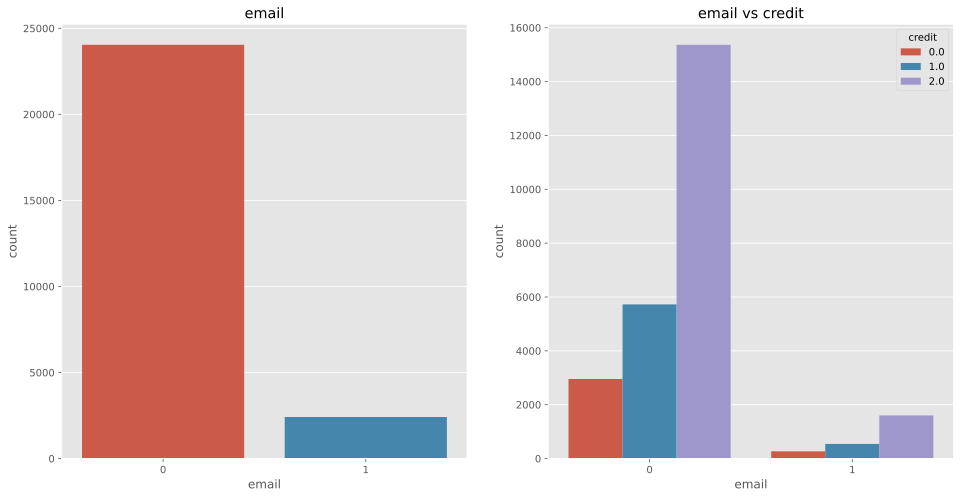

In [689]:
f, ax=plt.subplots(1, 2,figsize=(16,8))
sns.countplot(data=train, x="email",ax=ax[0])
ax[0].set_title("email")
sns.countplot(data=train, x="email",ax=ax[1], hue='credit')
ax[1].set_title("email vs credit")
plt.show()

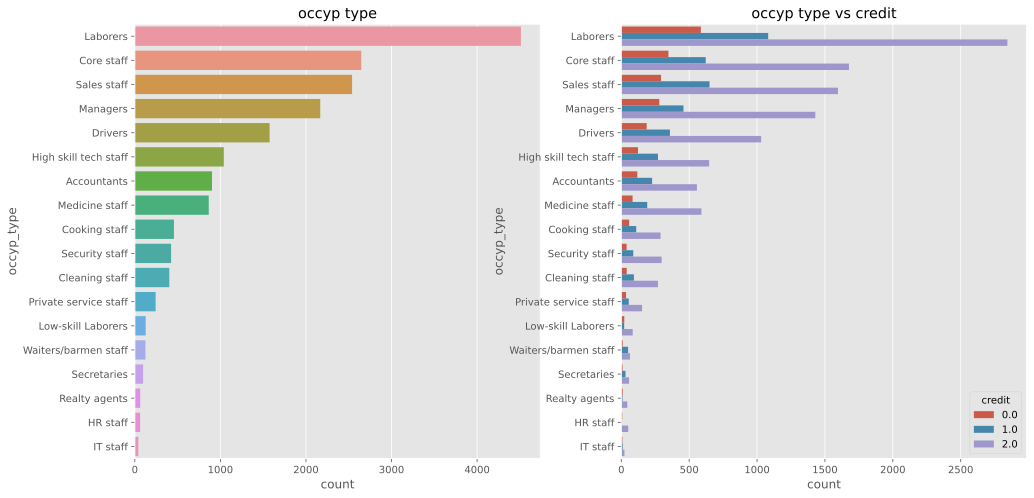

In [690]:
f, ax=plt.subplots(1, 2,figsize=(16,8))
sns.countplot(data=train, y="occyp_type",ax=ax[0], order=train['occyp_type'].value_counts().sort_values(ascending=False).index)
ax[0].set_title("occyp type")
sns.countplot(data=train, y="occyp_type",ax=ax[1], hue='credit', order=train['occyp_type'].value_counts().sort_values(ascending=False).index)
ax[1].set_title("occyp type vs credit")
plt.show()

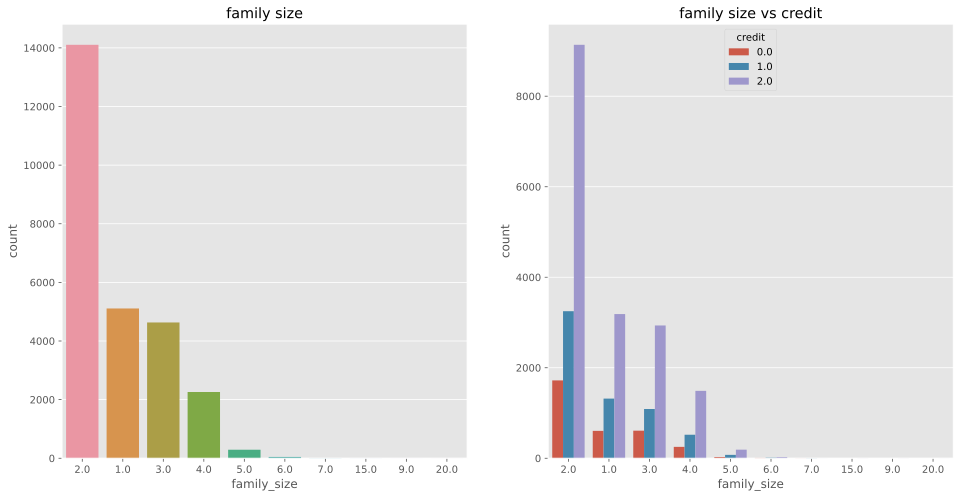

In [691]:
f, ax=plt.subplots(1, 2,figsize=(16,8))
sns.countplot(data=train, x="family_size",ax=ax[0], order=train['family_size'].value_counts().sort_values(ascending=False).index)
ax[0].set_title("family size")
sns.countplot(data=train, x="family_size",ax=ax[1], hue='credit', order=train['family_size'].value_counts().sort_values(ascending=False).index)
ax[1].set_title("family size vs credit")
plt.show()

begin_month(신용카드 발급 월)에 음수를 곱하여 모두 양수로 만들어 줌

신용카드를 발급받은지 얼마나 지났는지 확인 할 수 있음

In [692]:
train['begin_month'] = train["begin_month"] * -1

In [693]:
train["begin_month"] / 12

0        0.500000
1        0.416667
2        1.833333
3        3.083333
4        2.166667
           ...   
26452    0.166667
26453    3.916667
26454    2.083333
26455    4.916667
26456    0.750000
Name: begin_month, Length: 26457, dtype: float64

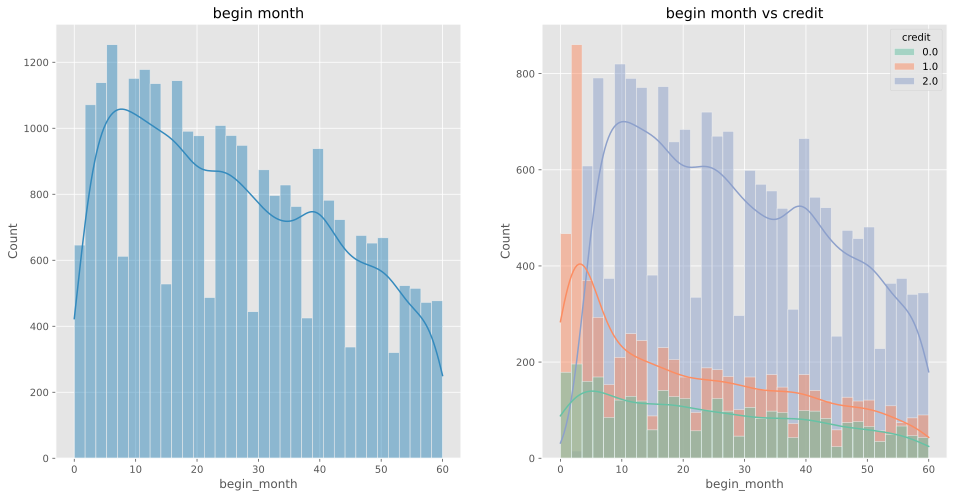

In [694]:
f, ax = plt.subplots(1,2,figsize=(16,8))
sns.histplot(data=train, x='begin_month', kde=True, ax=ax[0])
ax[0].set_title("begin month")
sns.histplot(data=train, x='begin_month', kde=True, ax=ax[1], hue='credit', palette="Set2")
ax[1].set_title("begin month vs credit")
plt.show()

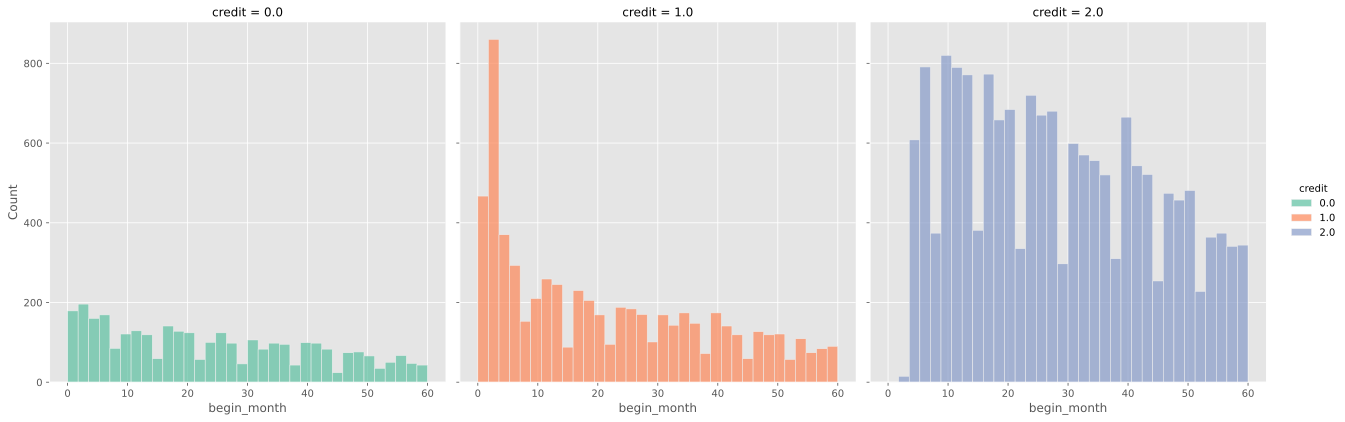

In [695]:
sns.displot(data=train,x='begin_month', hue='credit', col='credit', palette="Set2", height=6)

# 3.상관관계

In [696]:
train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit',
       'income_total_group', 'age', 'age_group', 'employed_year',
       'employed_group'],
      dtype='object')

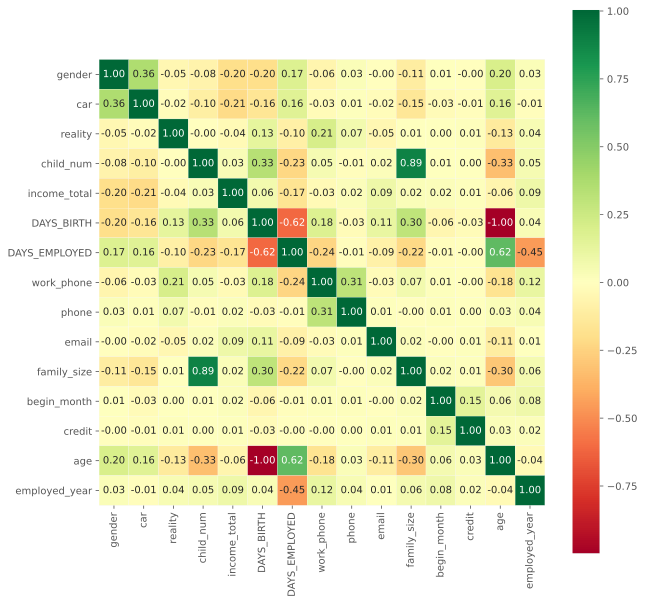

In [697]:
corr = train.drop(["index","FLAG_MOBIL"],axis=1).corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, square=True, annot=True, fmt='.2f', linecolor='white', linewidths=0.2, cmap="RdYlGn")

상관관계를 살펴보니 family_size와 child_num이 높은 상관을 보임 둘의 특성을 관련지어 새로운 특성을 만듬

In [698]:
train['household'] = np.nan

In [699]:
train.loc[(train['child_num'] == 0) & (train['family_size']== 1), "household"] = "Alone"      # Alone
train.loc[(train['child_num'] == 0) & (train['family_size']== 2), "household"] = "Couple"     # Couple
train.loc[(train['child_num'] == 1) & (train['family_size']== 3), "household"] = "3household" # 3household
train.loc[(train['child_num'] == 2) & (train['family_size']== 4), "household"] = "4household" # 4household
train.loc[(train['child_num'] == 3) & (train['family_size']== 5), "household"] = "5household" # 5household
train.loc[(train['child_num'] == 1) & (train['family_size']== 2), "household"] = "Widow"      # Widow
train.loc[train['household'].isnull()] = "Remainder"                                          # Remainder

# 4.데이터 전처리

In [745]:
#데이터 다시 불러오기
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/Data/creditcard/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/Data/creditcard/test.csv")

In [746]:
# #정수화 시키기
# train['gender'] = train['gender'].map({"M":0,"F":1})
# test['gender'] = test['gender'].map({"M":0,"F":1})

# train['car'] = train['car'].map({'Y':0,"N":1})
# test['car'] = test['car'].map({'Y':0,"N":1})

# train['reality'] = train['reality'].map({"Y":0,"N":1})
# test['reality'] = test['reality'].map({"Y":0,"N":1})

In [747]:
#income_total의 값 변경
train['income_total'] = train['income_total'] / 1000
test['income_total'] = test['income_total'] / 1000

In [748]:
#income_total_group 생성
train['income_total_group'] = np.nan
test['income_total_group'] = np.nan

In [749]:
# income_total_group 범주화
train.loc[(0<train["income_total"]) & (train['income_total'] < 100), "income_total_group"] = "100_less"
train.loc[(100<train["income_total"]) & (train['income_total'] < 200), "income_total_group"] = "200_less"
train.loc[(200<train["income_total"]) & (train['income_total'] < 300), "income_total_group"] = "300_less"
train.loc[(300<train["income_total"]) & (train['income_total'] < 400), "income_total_group"] = "400_less"
train.loc[(400<train["income_total"]) & (train['income_total'] < 500), "income_total_group"] = "500_less"
train.loc[(500<train["income_total"]), "income_total_group"] = "500_more"

#test
test.loc[(0<test["income_total"]) & (test['income_total'] < 100), "income_total_group"] = "100_less"
test.loc[(100<test["income_total"]) & (test['income_total'] < 200), "income_total_group"] = "200_less"
test.loc[(200<test["income_total"]) & (test['income_total'] < 300), "income_total_group"] = "300_less"
test.loc[(300<test["income_total"]) & (test['income_total'] < 400), "income_total_group"] = "400_less"
test.loc[(400<test["income_total"]) & (test['income_total'] < 500), "income_total_group"] = "500_less"
test.loc[(500<test["income_total"]), "income_total_group"] = "500_more"

In [750]:
#age 생성
train['age'] = np.trunc(train["DAYS_BIRTH"] / -365)
test['age'] = np.trunc(test["DAYS_BIRTH"] / -365)

In [751]:
#age_group 생성
train['age_group'] = np.nan
test['age_group'] = np.nan

In [752]:
# age_group 범주화
train.loc[(20 <= train['age']) &(train['age'] < 30), "age_group"] = "20s"
train.loc[(30 <= train['age']) &(train['age'] < 40), "age_group"] = "30s"
train.loc[(40 <= train['age']) &(train['age'] < 50), "age_group"] = "40s"
train.loc[(50 <= train['age']) &(train['age'] < 60), "age_group"] = "50s"
train.loc[(60 <= train['age']) &(train['age'] < 70), "age_group"] = "60s"

#test
test.loc[(20 <= test['age']) & (test['age'] < 30), "age_group"] = "20s"
test.loc[(30 <= test['age']) & (test['age'] < 40), "age_group"] = "30s"
test.loc[(40 <= test['age']) & (test['age'] < 50), "age_group"] = "40s"
test.loc[(50 <= test['age']) & (test['age'] < 60), "age_group"] = "50s"
test.loc[(60 <= test['age']) & (test['age'] < 70), "age_group"] = "60s"

In [753]:
#employed_year 생성
train['employed_year'] = np.nan
test['employed_year'] = np.nan

In [754]:
#employed_year 값 변경
train['employed_year'] = np.trunc(train["DAYS_EMPLOYED"] / -365)
train.loc[train['employed_year'] == -1000, "employed_year"] = -1 # -1은 미취업 상태

test['employed_year'] = np.trunc(test["DAYS_EMPLOYED"] / -365)
test.loc[test['employed_year'] == -1000, "employed_year"] = -1 # -1은 미취업 상태

In [755]:
#employed_group 생성
train["employed_group"] = np.nan
test["employed_group"] = np.nan

In [756]:
#employed_group 범주화
train.loc[train['employed_year'] == -1, "employed_group"] = "Unemployed"
train.loc[(0 <= train['employed_year']) & (train['employed_year'] <= 5), "employed_group"] = "5_less"
train.loc[(5 < train['employed_year']) & (train['employed_year'] <= 10), "employed_group"] = "10_less"
train.loc[(10 < train['employed_year']) & (train['employed_year'] <= 15), "employed_group"] = "15_less"
train.loc[(15 < train['employed_year']) & (train['employed_year'] <= 20), "employed_group"] = "20_less"
train.loc[(20 < train['employed_year']) & (train['employed_year'] <= 25), "employed_group"] = "25_less"
train.loc[(25 < train['employed_year']) & (train['employed_year'] <= 30), "employed_group"] = "30_less"
train.loc[(30 < train['employed_year']), "employed_group"] = "30_more"

test.loc[test['employed_year'] == -1, "employed_group"] = "Unemployed"
test.loc[(0 <= test['employed_year']) & (test['employed_year'] <= 5), "employed_group"] = "5_less"
test.loc[(5 < test['employed_year']) & (test['employed_year'] <= 10), "employed_group"] = "10_less"
test.loc[(10 < test['employed_year']) & (test['employed_year'] <= 15), "employed_group"] = "15_less"
test.loc[(15 < test['employed_year']) & (test['employed_year'] <= 20), "employed_group"] = "20_less"
test.loc[(20 < test['employed_year']) & (test['employed_year'] <= 25), "employed_group"] = "25_less"
test.loc[(25 < test['employed_year']) & (test['employed_year'] <= 30), "employed_group"] = "30_less"
test.loc[(30 < test['employed_year']), "employed_group"] = "30_more"

In [757]:
#begin_month 값 변경
train['begin_month'] = train["begin_month"] * -1
test['begin_month'] = test["begin_month"] * -1

In [758]:
#household 생성
train['household'] = np.nan
test['household'] = np.nan

In [759]:
#household 값 변경
train.loc[(train['child_num'] == 0) & (train['family_size']== 1), "household"] = "Alone"      # Alone
train.loc[(train['child_num'] == 0) & (train['family_size']== 2), "household"] = "Couple"     # Couple
train.loc[(train['child_num'] == 1) & (train['family_size']== 3), "household"] = "3household" # 3household
train.loc[(train['child_num'] == 2) & (train['family_size']== 4), "household"] = "4household" # 4household
train.loc[(train['child_num'] == 3) & (train['family_size']== 5), "household"] = "5household" # 5household
train.loc[(train['child_num'] == 1) & (train['family_size']== 2), "household"] = "Widow"      # Widow
train.loc[train['household'].isnull(), "household"] = "Remainder"

test.loc[(test['child_num'] == 0) & (test['family_size']== 1), "household"] = "Alone"      # Alone
test.loc[(test['child_num'] == 0) & (test['family_size']== 2), "household"] = "Couple"     # Couple
test.loc[(test['child_num'] == 1) & (test['family_size']== 3), "household"] = "3household" # 3household
test.loc[(test['child_num'] == 2) & (test['family_size']== 4), "household"] = "4household" # 4household
test.loc[(test['child_num'] == 3) & (test['family_size']== 5), "household"] = "5household" # 5household
test.loc[(test['child_num'] == 1) & (test['family_size']== 2), "household"] = "Widow"      # Widow
test.loc[test['household'].isnull(), "household"] = "Remainder"

In [760]:
train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit',
       'income_total_group', 'age', 'age_group', 'employed_year',
       'employed_group', 'household'],
      dtype='object')

In [761]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,income_total_group,age,age_group,employed_year,employed_group,household
0,0,F,N,N,0,202.5,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,6.0,1.0,300_less,38.0,30s,12.0,15_less,Couple
1,1,F,N,Y,1,247.5,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,5.0,1.0,300_less,31.0,30s,4.0,5_less,3household
2,2,M,Y,Y,0,450.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,22.0,2.0,500_less,52.0,50s,12.0,15_less,Couple
3,3,F,N,Y,0,202.5,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,37.0,0.0,300_less,41.0,40s,5.0,5_less,Couple
4,4,F,Y,Y,0,157.5,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,26.0,2.0,200_less,41.0,40s,5.0,5_less,Couple


## 4.1 One-Hot-Encoding

In [762]:
columns = ["gender","car","reality","income_type","edu_type","family_type","house_type","work_phone","phone","email","income_total_group","age_group","employed_group","household"]

train = pd.get_dummies(data=train, columns=columns)
test = pd.get_dummies(data=test, columns=columns)

In [763]:
train.head()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,occyp_type,family_size,begin_month,credit,age,employed_year,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,work_phone_0,work_phone_1,phone_0,phone_1,email_0,email_1,income_total_group_100_less,income_total_group_200_less,income_total_group_300_less,income_total_group_400_less,income_total_group_500_less,income_total_group_500_more,age_group_20s,age_group_30s,age_group_40s,age_group_50s,age_group_60s,employed_group_10_less,employed_group_15_less,employed_group_20_less,employed_group_25_less,employed_group_30_less,employed_group_30_more,employed_group_5_less,employed_group_Unemployed,household_3household,household_4household,household_5household,household_Alone,household_Couple,household_Remainder,household_Widow
0,0,0,202.5,-13899,-4709,1,NaN,2.0,6.0,1.0,38.0,12.0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,1,247.5,-11380,-1540,1,Laborers,3.0,5.0,1.0,31.0,4.0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,2,0,450.0,-19087,-4434,1,Managers,2.0,22.0,2.0,52.0,12.0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3,0,202.5,-15088,-2092,1,Sales staff,2.0,37.0,0.0,41.0,5.0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,4,0,157.5,-15037,-2105,1,Managers,2.0,26.0,2.0,41.0,5.0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [742]:
# columns = ["income_type","edu_type","family_type","house_type","occyp_type","income_total_group","age_group","employed_group","household"]


# for column in columns:
#   for i in range(train[column].nunique()):
#     train.loc[train[column] == train[column].unique()[i], column] = i

## 4.2 drop column

In [764]:
drop_columns = ["index","child_num","income_total","DAYS_BIRTH","DAYS_EMPLOYED","FLAG_MOBIL","occyp_type","employed_year","family_size"]
train = train.drop(drop_columns, axis=1)
test = test.drop(drop_columns,axis=1)

In [766]:
train.columns

Index(['begin_month', 'credit', 'age', 'gender_F', 'gender_M', 'car_N',
       'car_Y', 'reality_N', 'reality_Y', 'income_type_Commercial associate',
       'income_type_Pensioner', 'income_type_State servant',
       'income_type_Student', 'income_type_Working',
       'edu_type_Academic degree', 'edu_type_Higher education',
       'edu_type_Incomplete higher', 'edu_type_Lower secondary',
       'edu_type_Secondary / secondary special', 'family_type_Civil marriage',
       'family_type_Married', 'family_type_Separated',
       'family_type_Single / not married', 'family_type_Widow',
       'house_type_Co-op apartment', 'house_type_House / apartment',
       'house_type_Municipal apartment', 'house_type_Office apartment',
       'house_type_Rented apartment', 'house_type_With parents',
       'work_phone_0', 'work_phone_1', 'phone_0', 'phone_1', 'email_0',
       'email_1', 'income_total_group_100_less', 'income_total_group_200_less',
       'income_total_group_300_less', 'income_total

# 5.머신러닝

In [853]:
X = train.drop(["credit"],axis=1)
y = train[['credit']]

print(X.shape, y.shape, test.shape)

(26457, 61) (26457, 1) (10000, 61)


In [854]:
from sklearn.model_selection import train_test_split

X_train , X_val, y_train, y_val = train_test_split(X, y, stratify = y , test_size=0.3, random_state=42)
print("Train Set : ")
print(X_train.shape, y_train.shape)
print("Val Set : ")
print(X_val.shape, y_val.shape)

Train Set : 
(18519, 61) (18519, 1)
Val Set : 
(7938, 61) (7938, 1)


In [856]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import log_loss
from tensorflow.keras.utils import to_categorical

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_val, y_val))
dt_pred = dt.predict_proba(X_val)

print("log_loss : {}".format(log_loss(to_categorical(y_val['credit']), dt_pred)))

# log_loss(to_categorical(y_val['credit']), y_pred)

0.9775365840488147
0.5876795162509448
log_loss : 13.78586707173136


In [857]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_val, y_val))
rf_pred = dt.predict_proba(X_val)
print("log_loss : {}".format(log_loss(to_categorical(y_val['credit']), rf_pred)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9775365840488147
0.6880826404635928
log_loss : 13.78586707173136


In [858]:
gb = GradientBoostingClassifier(n_estimators=500, random_state=42)
gb.fit(X_train, y_train)
print(gb.score(X_train, y_train))
print(gb.score(X_val, y_val))
gb_pred = gb.predict_proba(X_val)
print("log_loss : {}".format(log_loss(to_categorical(y_val['credit']), gb_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7073276094821535
0.6921138825900731
log_loss : 0.793723230948135


In [867]:
gb_pred = gb.predict_proba(test)

# 6.제출

In [868]:
sample_submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/Data/creditcard/sample_submission.csv")
sample_submission.head()

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0


In [869]:
sample_submission.loc[:, 1:] = gb_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  """Entry point for launching an IPython kernel.


In [835]:
# sample_submission['y_pred'] = gb_pred
# sample_submission = pd.get_dummies(sample_submission, columns=["y_pred"])
# sample_submission.head()

,index,0,1,2,y_pred_0.0,y_pred_1.0,y_pred_2.0
0,26457,0,0,0,0,0,1
1,26458,0,0,0,0,0,1
2,26459,0,0,0,0,0,1
3,26460,0,0,0,0,0,1
4,26461,0,0,0,0,0,1


In [836]:
# sample_submission = sample_submission.drop(['0','1','2'], axis=1)
# sample_submission = sample_submission.rename(columns={'y_pred_0.0':"0", 'y_pred_1.0' : "1", 'y_pred_2.0' : "2"})
# sample_submission.head()

,index,0,1,2
0,26457,0,0,1
1,26458,0,0,1
2,26459,0,0,1
3,26460,0,0,1
4,26461,0,0,1


In [872]:
sample_submission.head()

,index,0,1,2
0,26457,0.040598,0.148237,0.811165
1,26458,0.139617,0.159386,0.700997
2,26459,0.157953,0.183056,0.658991
3,26460,0.152080,0.175502,0.672418
4,26461,0.080569,0.174936,0.744495


In [873]:
submit = "gb_submit_baseline"
sample_submission.to_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/Dacon/creditcard/{}.csv".format(submit), index=False, encoding='utf-8')

In [874]:
test_sub = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/Dacon/creditcard/{}.csv".format(submit))

index     True
0        False
1        False
2        False
dtype: bool